# Program II: Benchmarking Insertion and Selection Sorts
### By: Drew Mattson, Ian Czerkis, Akashdeep Gill
## Introduction
The purpose of this lab is to benchmark the time complexity of two different sorting algorithms, insertion sort and selection sort. This will be completed by first implementing the two sorting algorithms, testing the correctness of these algorithms, and then setting up and running benchmarks of different sizes and cases. The benchmark sizes increase exponentially from 10 to 100000 to get a more accurate analysis of the time complexity of each algorithm. Once the benchmarks successfully run, a plot will be generated for each benchmark case (best, average, worst) containing the logarithm of the runtime versus the logarithm of the benchmark list size for both sorting algorithms, as well as a line of best fit for these data points and its formula, including the line's slope. Using this data, we will draw conclusions about the actual, observed time complexities of the algorithms in comparison to their theoretical time complexities, as well as the performance and practical usage of each algorithm.
## Setup

In [134]:
import copy
import time
import random
import matplotlib.pyplot as plt
import unittest
import numpy as np
from scipy.stats import linregress

# Sorting Algorithms
## Insertion Sort

In [135]:
def insertion_sort(lst):
    size = len(lst)
    # iterate from index 1 to array length
    for j in range(1, size):
        key = lst[j]
        i = j - 1
        # shift elements to appropriate spots if necessary
        while i >= 0 and lst[i] > key:
            lst[i+1] = lst[i]
            i = i - 1
        # place key in its appropriate sorted position
        lst[i+1] = key


## Selection Sort

In [136]:
def selection_sort(lst):
    size = len(lst)
    for ind in range(size):
        min_index = ind
 
        for j in range(ind + 1, size):
            # select the minimum element in every iteration
            if lst[j] < lst[min_index]:
                min_index = j
         # swap the elements to sort the array
        (lst[ind], lst[min_index]) = (lst[min_index], lst[ind])

## Correctness Testing

In [137]:
original_tests_cases = [
    ([3, 2, 1], [1, 2, 3]),
    ([1, 2, 3], [1, 2, 3]),
    ([0, 0, 0], [0, 0, 0]),
    ([1, 8, 7, 9, 2, 4, 10, 5, 6, 3], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
    ([492, 215, 761, 38, 904, 127, 589, 333, 674, 51], [38, 51, 127, 215, 333, 492, 589, 674, 761, 904]),
    ([724, 138, 502, 891, 267, 605, 49, 803, 416, 175], [49, 138, 175, 267, 416, 502, 605, 724, 803, 891]),
    ([0.587, 0.231, 0.895, 0.412, 0.674, 0.138, 0.759, 0.523, 0.946, 0.301], [0.138, 0.231, 0.301, 0.412, 0.523, 0.587, 0.674, 0.759, 0.895, 0.946]),
    ([-55, 72, -18, 41, -93, 7, 64, -29, 15, -84], [-93, -84, -55, -29, -18, 7, 15, 41, 64, 72])
]

def get_deep_copy_of_test_cases():
    return copy.deepcopy(original_tests_cases)

class TestAlgorithms(unittest.TestCase):
    def test_selection_sort(self):
        test_cases = get_deep_copy_of_test_cases()
        for input_lst, expected_output in test_cases:
            with self.subTest(input_lst=input_lst):
                selection_sort(input_lst)
                self.assertEqual(input_lst, expected_output)

    def test_insertion_sort(self):
            test_cases = get_deep_copy_of_test_cases()
            for input_lst, expected_output in test_cases:
                with self.subTest(input_lst=input_lst):
                    insertion_sort(input_lst)
                    self.assertEqual(input_lst, expected_output)

result = unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestAlgorithms))

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


All tests passed


# Benchmarking
## Set Up Benchmarks

In [138]:
algorithms = [selection_sort, insertion_sort]
benchmark_sizes = [10, 100, 1000, 10000, 100000]
benchmark_cases = ['sorted', 'random', 'reversed']

def generate_random_list(size, case):
    if case == 'random':
        return random.sample(range(1, size + 1), size)
    elif case == 'sorted':
        return list(range(1, size + 1))
    elif case == 'reversed':
        return list(range(size, 0, -1))

def benchmark(sorting_algorithm, lst):
    copy_lst = copy.deepcopy(lst)
    start_time = time.perf_counter()
    sorting_algorithm(copy_lst)
    end_time = time.perf_counter()
    return end_time - start_time

def benchmark_algorithms():
    results = {}
    for size in benchmark_sizes:
        for case in benchmark_cases:
            lst = generate_random_list(size, case)
            for algorithm in algorithms:
                key = (algorithm.__name__, size, case)
                results[key] = benchmark(algorithm, lst)

    return results

def plot_benchmarks():
    results = benchmark_algorithms()

    insertion_sort_color = 'royalblue'
    selection_sort_color = 'darkred'

    for case in benchmark_cases:
        plt.figure()

        # Plot insertion_sort data points
        insertion_sort_data = [(size, results[('insertion_sort', size, case)]) for size in benchmark_sizes]
        sizes_insertion, times_insertion = zip(*insertion_sort_data)
        plt.scatter(sizes_insertion, times_insertion, label=f'Insertion Sort - {case}'.title(), color=insertion_sort_color)

        # Plot insertion_sort line of best fit
        slope_insertion, intercept_insertion, _, _, _ = linregress(np.log(sizes_insertion), np.log(times_insertion))
        plt.plot(sizes_insertion, np.exp(intercept_insertion + slope_insertion * np.log(sizes_insertion)), linestyle='--', color=insertion_sort_color)

        # Plot selection_sort data points
        selection_sort_data = [(size, results[('selection_sort', size, case)]) for size in benchmark_sizes]
        sizes_selection, times_selection = zip(*selection_sort_data)
        plt.scatter(sizes_selection, times_selection, label=f'Selection Sort - {case}'.title(), color=selection_sort_color)

        # Plot selection_sort line of best fit
        slope_selection, intercept_selection, _, _, _ = linregress(np.log(sizes_selection), np.log(times_selection))
        plt.plot(sizes_selection, np.exp(intercept_selection + slope_selection * np.log(sizes_selection)), linestyle='--', color=selection_sort_color)

        # Add labels and legend
        plt.xlabel('log(List Size)')
        plt.ylabel('log(Algorithm Execution Time)')
        plt.title(f'Algorithm Benchmarking - {case}'.title())
        plt.legend()

        # Set axis to logarithmic scale
        plt.xscale('log')
        plt.yscale('log')

        # Add equation of the line for insertion_sort
        equation_insertion = f'y = {np.exp(intercept_insertion):.4f} + x^{slope_insertion:.4f}'
        plt.text(0.2, 0.8, equation_insertion, transform=plt.gca().transAxes, color=insertion_sort_color)

        # Add equation of the line for selection_sort
        equation_selection = f'y = {np.exp(intercept_selection):.4f} + x^{slope_selection:.4f}'
        plt.text(0.2, 0.7, equation_selection, transform=plt.gca().transAxes, color=selection_sort_color)

        # Show the plot
        plt.show()

## Run Benchmark

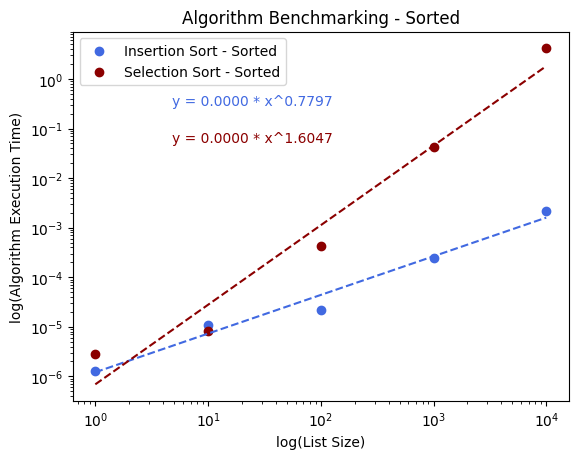

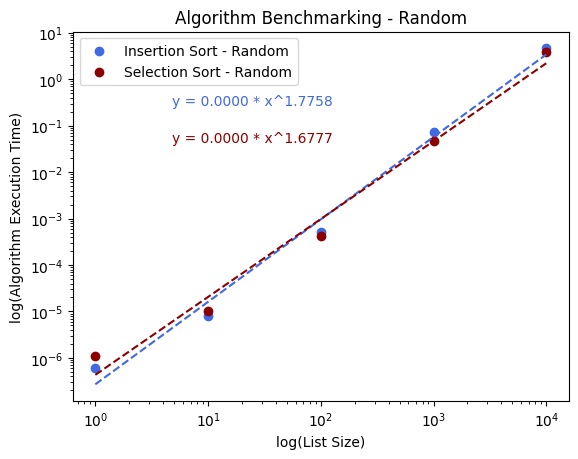

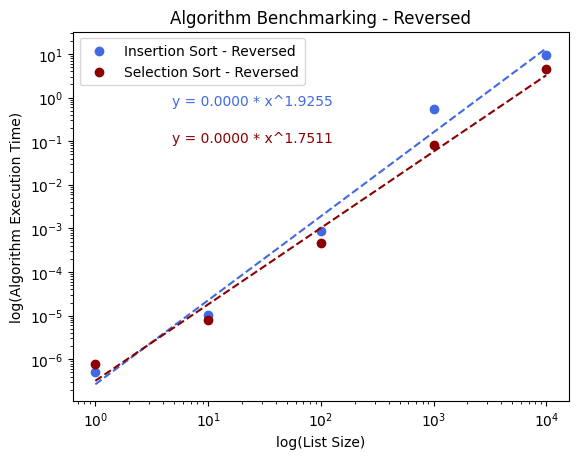

In [139]:
plot_benchmarks()

# Reflection
## Expected vs Observed Algorithm Performance
| Algorithm      | Case             | Expected Run Time | Observed Run Time |
|----------------|------------------|-------------------|-------------------|
| Insertion Sort | Best (Sorted)    | Θ(n)              | Θ(n)              |
| Insertion Sort | Average (Random) | Θ($n^{2}$)            | Θ($n^{2}$)            |
| Insertion Sort | Worst (Reversed) | Θ($n^{2}$)            | Θ($n^{2}$)            |
| Selection Sort | Best (Sorted)    | Θ($n^{2}$)            | Θ($n^{2}$)            |
| Selection Sort | Average (Random) | Θ($n^{2}$)            | Θ($n^{2}$)            |
| Selection Sort | Worst (Reversed) | Θ($n^{2}$)            | Θ($n^{2}$)            |

## Expected vs Observed Behavior
We expected the best case for insertion sort to be Θ(n). This is because the inner loop will never execute since the list is already sorted. This means only the outer loop will execute n times. This prediction is validated by the data since the slope is slightly less than 1. We expected the average and worst case for insertion sort to be Θ($n^{2}$). This is because the inner loop will execute n times in the average case and n times in the worst case. These predictions were proven correct by the benchmarking results since the slope for the average and worst case is slightly less than 2.

For Selection sort, we expected best, average, and worst case for selection sort to all be Θ($n^{2}$). This is because the inner loop will always execute on average n/2 times for each outer loop execution. Since the outer loop will also execute n times, the time complexity is Θ($n^{2}$). These predictions were also proven correct by the benchmarking results since the slope for the average and worst case is slightly less than 2.

All measured slopes were slightly less than expected. This is likely due to the overhead of some variable initialization inside the algorithm which is constant. Therefore, this time will have a greater impact on the overall time for smaller lists, but decrease as the list size increases. 

## Case by Case Analysis
# Algorithm Performance:

For best and average cases, Insertion Sort is expected to perform better as it has linear time complexity in the best case.
In the worst case, both algorithms have the same quadratic time complexity, so their performance will be comparable.

# Inner Loop Consideration:

Insertion Sort is generally more efficient in practice for small datasets and already partially sorted data due to its adaptive nature. Selection Sort's inner loop always runs involves finding the minimum element and swapping, which is inherently less efficient than the comparisons in Insertion Sort.


# Practical Usage:

In practice, the choice between insertion sort and selection sort would depend on the specific requirements and characteristics of the input data.

Use Insertion Sort when:
- The list is expected to be partially sorted or has a high likelihood of being already sorted.
- The overhead of the algorithm is acceptable for small to medium-sized lists.
- Stability in sorting is crucial (insertion sort is stable).

Use Selection Sort when:
- Memory usage needs to be minimized as it performs a constant number of swaps.
- The list is relatively small, and simplicity is preferred over efficiency.
- The stability of sorting is not a primary concern.

## Overall Analysis

Ultimately, the choice between insertion sort and selection sort would be application-dependent, considering factors such as input data characteristics, size of the data, and specific performance requirements. In general, insertion sort is more efficient for small datasets and partially/fully sorted data, while selection sort is more memory-efficient and has a simpler implementation.